In [7]:
import DES
import plotting
import simpy as sip
import numpy as np
from collections import deque
import pandas as pd
import os
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Queuing Systems
In this notebook, we will not be generating any data to save on runtime.
Data will be loaded into this notebook to recreate the plots found in the report.

### Distributions of mean waiting times

0.83 Fifo ordering
4 server mean waiting times: 0.9910690738482006
2 server mean waiting times: 2.2481817950992253
1 server mean waiting times: 4.936625507969513


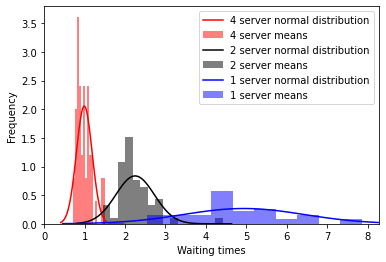

0.91 Fifo ordering
4 server mean waiting times: 2.26412342572846
2 server mean waiting times: 4.7347555909403845
1 server mean waiting times: 8.914694348396855


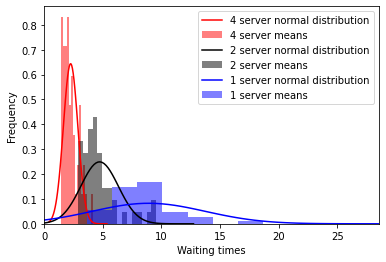

0.94 Fifo ordering
4 server mean waiting times: 3.7172514756160298
2 server mean waiting times: 7.872981775395667
1 server mean waiting times: 16.583717760002436


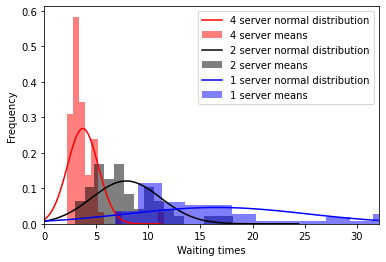

0.98 Fifo ordering
4 server mean waiting times: 10.954416282714531
2 server mean waiting times: 23.29907401878155
1 server mean waiting times: 40.61920521730528


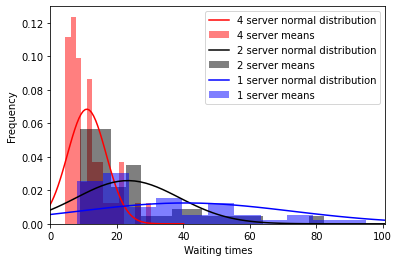

0.99 Fifo ordering
4 server mean waiting times: 24.591224182495747
2 server mean waiting times: 27.35776977136831
1 server mean waiting times: 41.519625785283466


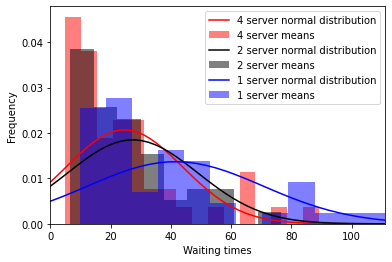

0.83 Shortest job ordering
4 server mean waiting times: 0.9958986157760641
2 server mean waiting times: 2.206922555281629
1 server mean waiting times: 5.142890204600776


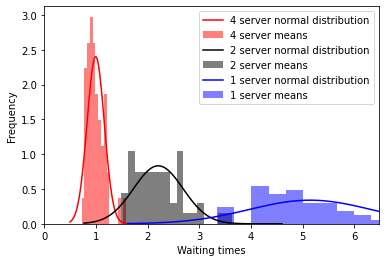

0.91 Shortest job ordering
4 server mean waiting times: 2.1669197660047708
2 server mean waiting times: 4.661674906189137
1 server mean waiting times: 9.893944804538227


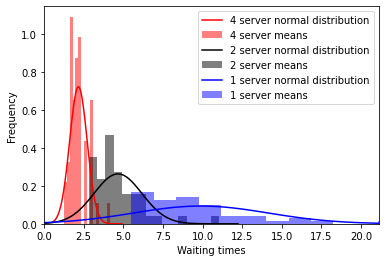

0.94 Shortest job ordering
4 server mean waiting times: 3.6296577899325446
2 server mean waiting times: 7.341801301084067
1 server mean waiting times: 16.634804648452313


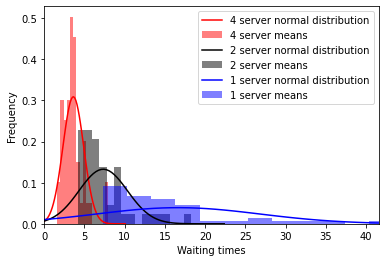

0.98 Shortest job ordering
4 server mean waiting times: 12.567521072651793
2 server mean waiting times: 21.844228056044493
1 server mean waiting times: 39.77843873074396


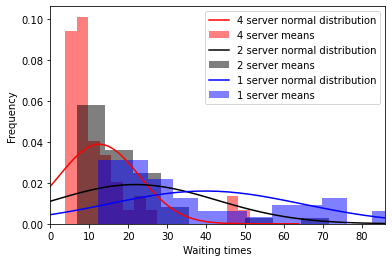

0.99 Shortest job ordering
4 server mean waiting times: 17.223608876945562
2 server mean waiting times: 28.69405346402212
1 server mean waiting times: 49.28234993961669


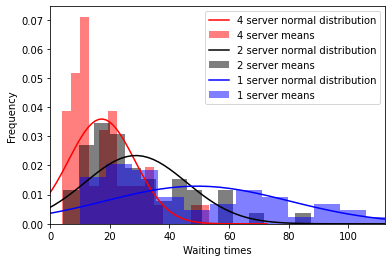

In [8]:
mulamb = [(1,1.2), (1,1.1), (1,1.06), (1,1.02), (1,1.01)]
rhos = [np.round((1/l)/m, 2) for m,l in mulamb]
for r in rhos:
    print(r, 'Fifo ordering')
    name = f"servers_{r}_50"
    res_dict, cutoffs = DES.waiting_times(name)
    plotting.plots(res_dict, cutoffs)

for r in rhos:
    print(r, 'Shortest job ordering')
    name = f"servers_prio_{r}_50"
    res_dict, cutoffs = DES.waiting_times(name)
    plotting.plots(res_dict, cutoffs)

### Mean waiting times with confidence interval for increasing rho

Fifo ordering


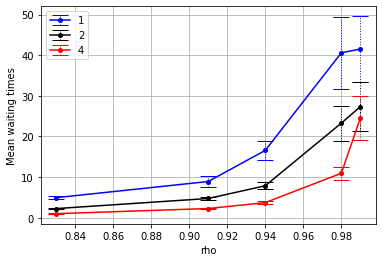

Shortest job ordering


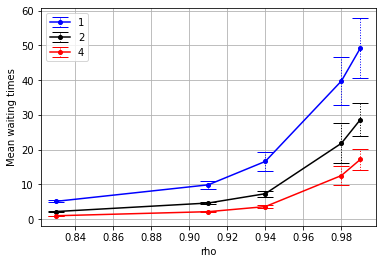

Exponential service rate


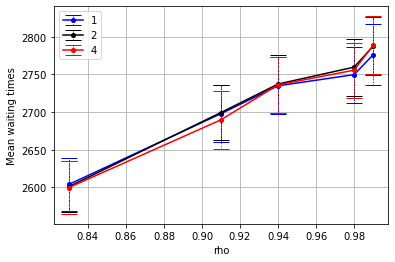

Constant service rate


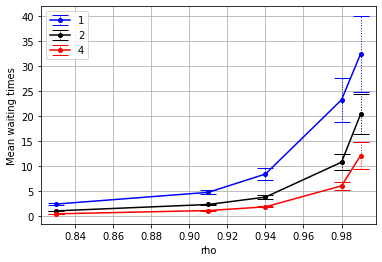

In [9]:
print('Fifo ordering')
plotting.rho_v_wait('servers')

print('Shortest job ordering')
plotting.rho_v_wait('servers_prio')

print('Exponential service rate')
plotting.rho_v_wait('servers_exp')

print('Constant service rate')
plotting.rho_v_wait('servers_const')

## Significance plots

Steps used to get generate these plots:
1. Data was generated with gen_data.py
2. Evaluation for significance was done by calling gen_signif_csv() from the significance.py file.
3. Data is loaded into this notebook.

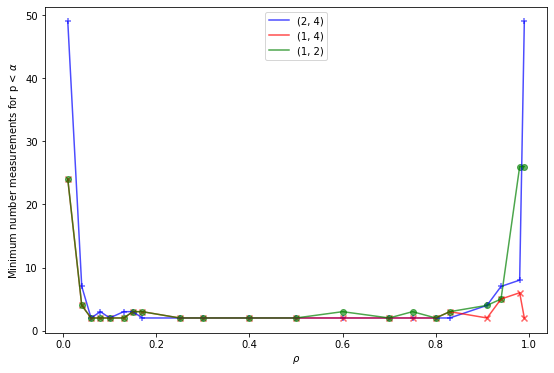

In [2]:
nr_means = 49
res = pd.read_csv(f'signif_data/iters_sign_data{nr_means}.csv')
colors = ['blue','red','green']
markers = ['+','x','o']
plt.figure(figsize=(9,6))
for i, comp in enumerate(list(set(res['comparison']))):
    cur_comp = res[res['comparison']==comp]
    plt.plot(cur_comp['rho'],cur_comp['low_idx_sign'],
                 label = f'{comp}',color=colors[i], alpha = .7)
    plt.scatter(cur_comp['rho'],cur_comp['low_idx_sign'],color=colors[i], alpha = .6,marker=markers[i])
plt.xlabel(fr"$\rho$")
plt.ylabel(fr"Minimum number measurements for p < $\alpha$")
plt.legend()
plt.savefig('Images/'+"sig_iters"+'.svg', bbox_inches="tight")

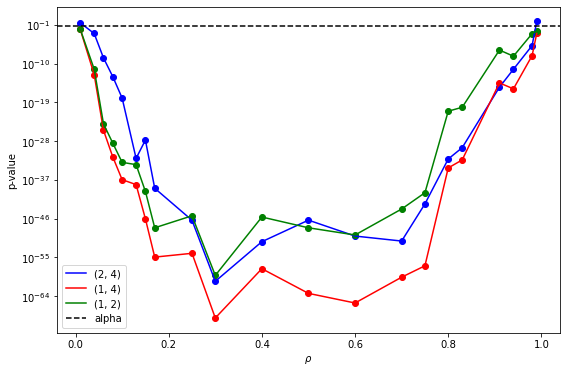

In [3]:
res = pd.read_csv(f'signif_data/p_vals_sign_data{nr_means}.csv')
colors = ['blue','red','green']
plt.figure(figsize=(9,6))
for i, comp in enumerate(list(set(res['comparison']))):
    cur_comp = res[res['comparison']==comp]
    plt.semilogy(cur_comp['rho'],cur_comp['low_idx_sign'],
                 label = f'{comp}',color=colors[i])
    plt.scatter(cur_comp['rho'],cur_comp['low_idx_sign'],color=colors[i])
plt.xlabel(fr"$\rho$")
plt.ylabel(f"p-value")
plt.axhline(0.05,label='alpha', color='black',linestyle='--')
plt.legend()
plt.savefig('Images/'+"p_val"+'.svg', bbox_inches="tight")